In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)

In [12]:
# utility functions
def process_res_df(df):
    df['fastest_alg'] = df.apply(lambda row: fastest_alg(row[['runtime.glmnet', 'runtime.ncvreg', 'runtime.lasso']]), axis=1)
    df['lasso_glmnet_runtime_ratio'] = df['runtime.lasso'] / df['runtime.glmnet']
    df['n_p_ratio'] = df['n'] / df['p']
    df['p0_p_ratio'] = df['p0'] / df['p']
    df['runtime_acceptable'] = (df['lasso_glmnet_runtime_ratio'] < 1.5) | (df['runtime.lasso'] < 2)
    return df
    
def fastest_alg(t_triple):
    t_triple = list(t_triple)
    return ['glmnet', 'ncvreg', 'lasso'][t_triple.index(min(t_triple))]

def analyze_measure_by_factor(df, measure, factor, plot=True):
    assert (measure in df.columns) & (factor in df.columns)
    print(f"Mean of {measure} by {factor}: \n{df.groupby([factor])[measure].mean()}")
    print(f"\nStd of {measure} by {factor}: \n{df.groupby([factor])[measure].std()}")
    if plot:
        ax = sns.histplot(data=df, x=measure, hue=factor, palette="Set2")
        if "ratio" in measure:
            ax.axvline(1, color="red")
        plt.show()

# Tests 10

In [13]:
df = pd.read_csv("tests10.csv")
df = process_res_df(df)
print(Counter(df['fastest_alg']))
df

Counter({'lasso': 328, 'glmnet': 188, 'ncvreg': 44})


n         p   p0  snr  obj.glmnet  obj.ncvreg  obj.lasso  \
0     200     100.0   10  0.1   22.249551   22.249650  22.249536   
1     200     100.0   10  0.5    4.926362    4.926385   4.926360   
2     200     100.0   10  1.0    2.656765    2.656783   2.656764   
3     200     100.0   10  2.0    1.472096    1.472135   1.472096   
4     200     100.0   10  4.0    0.843849    0.843876   0.843848   
5     200     100.0   20  0.1   25.913040   25.913108  25.913018   
6     200     100.0   20  0.5    5.767712    5.767749   5.767710   
7     200     100.0   20  1.0    3.124172    3.124189   3.124171   
8     200     100.0   20  2.0    1.750384    1.750387   1.750381   
9     200     100.0   20  4.0    1.032767    1.032773   1.032765   
10    200     100.0   50  0.1   18.711243   18.711321  18.711233   
11    200     100.0   50  0.5    4.162630    4.162657   4.162629   
12    200     100.0   50  1.0    2.293867    2.293902   2.293866   
13    200     100.0   50  2.0    1.342757    1.342774   1.342757   
14    200     100.0   50  4.0    0.863000    0.863025   0.863000   
15    200     100.0  100  0.1   34.344305   34.344403  34.344272   
16    200     100.0  100  0.5    7.393687    7.393755   7.393679   
17    200     100.0  100  1.0    4.018356    4.018404   4.018355   
18    200     100.0  100  2.0    2.322499    2.322538   2.322498   
19    200     100.0  100  4.0    1.476627    1.476656   1.476625   
20    200     200.0   10  0.1   39.728266   39.728427  39.728256   
21    200     200.0   10  0.5    9.805272    9.805290   9.805273   
22    200     200.0   10  1.0    5.528006    5.528011   5.528006   
23    200     200.0   10  2.0    3.312621    3.312623   3.312620   
24    200     200.0   10  4.0    2.198570    2.198572   2.198570   
25    200     200.0   20  0.1   45.243416   45.243549  45.243407   
26    200     200.0   20  0.5   11.430313   11.430336  11.430313   
27    200     200.0   20  1.0    6.657614    6.657631   6.657613   
28    200     200.0   20  2.0    4.193353    4.193360   4.193353   
29    200     200.0   20  4.0    2.953055    2.953058   2.953055   
30    200     200.0   50  0.1   21.736199   21.736783  21.736184   
31    200     200.0   50  0.5    6.778817    6.778892   6.778816   
32    200     200.0   50  1.0    4.523437    4.523496   4.523436   
33    200     200.0   50  2.0    3.347332    3.347353   3.347332   
34    200     200.0   50  4.0    2.743571    2.743587   2.743571   
35    200     200.0  100  0.1   35.704424   35.704696  35.704374   
36    200     200.0  100  0.5   11.436264   11.436473  11.436262   
37    200     200.0  100  1.0    7.841263    7.841340   7.841257   
38    200     200.0  100  2.0    5.898651    5.898703   5.898648   
39    200     200.0  100  4.0    4.859794    4.859813   4.859793   
40    200     500.0   10  0.1   30.513466   30.513682  30.513435   
41    200     500.0   10  0.5    8.666123    8.666175   8.666121   
42    200     500.0   10  1.0    5.078157    5.078184   5.078157   
43    200     500.0   10  2.0    3.063679    3.063681   3.063679   
44    200     500.0   10  4.0    2.031379    2.031382   2.031379   
45    200     500.0   20  0.1   35.955750   35.956187  35.955730   
46    200     500.0   20  0.5   10.412461   10.412546  10.412459   
47    200     500.0   20  1.0    6.313907    6.313939   6.313906   
48    200     500.0   20  2.0    4.037313    4.037326   4.037313   
49    200     500.0   20  4.0    2.847347    2.847355   2.847347   
50    200     500.0   50  0.1   19.691824   19.693034  19.691801   
51    200     500.0   50  0.5    6.278348    6.278406   6.278347   
52    200     500.0   50  1.0    4.287796    4.287813   4.287795   
53    200     500.0   50  2.0    3.222638    3.222656   3.222637   
54    200     500.0   50  4.0    2.668940    2.668956   2.668940   
55    200     500.0  100  0.1   31.730102   31.731141  31.730051   
56    200     500.0  100  0.5    9.696984    9.697386   9.696969   
57    200     500.0  100  1.0    6.702885    6.702924   6.702874

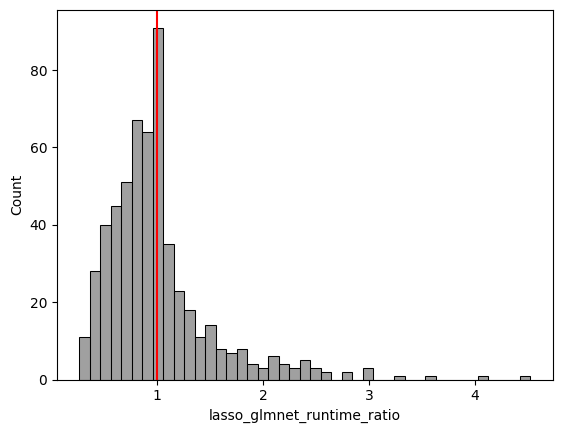

In [5]:
ax = sns.histplot(data=df, x="lasso_glmnet_runtime_ratio", color='gray')
ax.axvline(1, color='red')
plt.show()

In [14]:
analyze_measure_by_factor(df, "runtime_acceptable", "snr", plot=False)
analyze_measure_by_factor(df, "runtime_acceptable", "n_p_ratio", plot=False)
analyze_measure_by_factor(df, "runtime_acceptable", "p0_p_ratio", plot=False)

Mean of runtime_acceptable by snr: 
snr
0.1    0.946429
0.5    1.000000
1.0    1.000000
2.0    1.000000
4.0    1.000000
Name: runtime_acceptable, dtype: float64

Std of runtime_acceptable by snr: 
snr
0.1    0.226182
0.5    0.000000
1.0    0.000000
2.0    0.000000
4.0    0.000000
Name: runtime_acceptable, dtype: float64
Mean of runtime_acceptable by n_p_ratio: 
n_p_ratio
0.0010     1.000000
0.0025     1.000000
0.0040     1.000000
0.0050     1.000000
0.0100     1.000000
0.0200     1.000000
0.0250     1.000000
0.0400     1.000000
0.1000     0.983333
0.2000     1.000000
0.2500     1.000000
0.4000     1.000000
0.5000     1.000000
1.0000     0.950000
2.0000     1.000000
2.5000     0.950000
5.0000     1.000000
10.0000    1.000000
25.0000    1.000000
50.0000    1.000000
Name: runtime_acceptable, dtype: float64

Std of runtime_acceptable by n_p_ratio: 
n_p_ratio
0.0010     0.000000
0.0025     0.000000
0.0040     0.000000
0.0050     0.000000
0.0100     0.000000
0.0200     0.000000
0.0250     0.

In [7]:
analyze_measure_by_factor(df, "lasso_glmnet_runtime_ratio", "snr", plot=False)
analyze_measure_by_factor(df, "lasso_glmnet_runtime_ratio", "n_p_ratio", plot=False)
analyze_measure_by_factor(df, "obj.lasso", "snr", plot=False)
analyze_measure_by_factor(df, "obj.lasso", "n_p_ratio", plot=False)

Mean of lasso_glmnet_runtime_ratio by snr: 
snr
0.1    1.262656
0.5    1.009131
1.0    0.963859
2.0    0.903677
4.0    0.914951
Name: lasso_glmnet_runtime_ratio, dtype: float64

Std of lasso_glmnet_runtime_ratio by snr: 
snr
0.1    0.617503
0.5    0.483274
1.0    0.485545
2.0    0.385365
4.0    0.556856
Name: lasso_glmnet_runtime_ratio, dtype: float64
Mean of lasso_glmnet_runtime_ratio by n_p_ratio: 
n_p_ratio
0.0010     0.972737
0.0025     0.975405
0.0040     0.935010
0.0050     0.935585
0.0100     0.916755
0.0200     0.894302
0.0250     1.069722
0.0400     0.749426
0.1000     0.938950
0.2000     0.861749
0.2500     0.717256
0.4000     0.854649
0.5000     0.666165
1.0000     0.795129
2.0000     0.721466
2.5000     1.205652
5.0000     1.277480
10.0000    0.826924
25.0000    2.243518
50.0000    2.246367
Name: lasso_glmnet_runtime_ratio, dtype: float64

Std of lasso_glmnet_runtime_ratio by n_p_ratio: 
n_p_ratio
0.0010     0.065114
0.0025     0.090905
0.0040     0.179544
0.0050     0.1042

In [8]:

obj_threshold = 1e-4
print(len(df))
print(f"Num of obj.lasso - obj.glmnet > threshold: {sum(df['obj.lasso-obj.glmnet'] > obj_threshold)}")
print(f"Num of obj.lasso - obj.ncvreg > threshold: {sum(df['obj.lasso-obj.ncvreg'] > obj_threshold)}")
print(f"Num of obj.lasso - obj.ncvreg > threshold && obj.lasso - obj.glmnet > threshold: {sum((df['obj.lasso-obj.ncvreg'] > obj_threshold) & (df['obj.lasso-obj.ncvreg'] > obj_threshold))}")

560
Num of obj.lasso - obj.glmnet > threshold: 0
Num of obj.lasso - obj.ncvreg > threshold: 0
Num of obj.lasso - obj.ncvreg > threshold && obj.lasso - obj.glmnet > threshold: 0


In [9]:

obj_threshold = 0
print(len(df))
print(f"Num of obj.lasso - obj.glmnet > threshold: {sum(df['obj.lasso-obj.glmnet'] > obj_threshold)}")
print(f"Num of obj.lasso - obj.ncvreg > threshold: {sum(df['obj.lasso-obj.ncvreg'] > obj_threshold)}")
print(f"Num of obj.lasso - obj.ncvreg > threshold && obj.lasso - obj.glmnet > threshold: {sum((df['obj.lasso-obj.ncvreg'] > obj_threshold) & (df['obj.lasso-obj.ncvreg'] > obj_threshold))}")

560
Num of obj.lasso - obj.glmnet > threshold: 38
Num of obj.lasso - obj.ncvreg > threshold: 0
Num of obj.lasso - obj.ncvreg > threshold && obj.lasso - obj.glmnet > threshold: 0


In [22]:

obj_threshold = 0
temp_df = df[df['obj.lasso-obj.glmnet'] > obj_threshold]
print(len(temp_df))
print(Counter(temp_df['fastest_alg']))
print(f"Max difference: {max(temp_df['obj.lasso-obj.glmnet'])}")
temp_df[temp_df['fastest_alg'] == 'glmnet']

38
Counter({'lasso': 31, 'glmnet': 6, 'ncvreg': 1})
Max difference: 4.98241590918269e-06


n         p   p0  snr  obj.glmnet  obj.ncvreg  obj.lasso  \
112   200   50000.0   50  1.0    2.807055    2.807069   2.807056   
114   200   50000.0   50  4.0    1.971519    1.971545   1.971523   
153   500     100.0   50  2.0    1.722652    1.722665   1.722652   
311  1000     200.0   50  0.5    6.005448    6.005496   6.005448   
413  1000  200000.0   50  2.0    2.910847    2.911016   2.910848   
439  5000     100.0  100  4.0    1.995401    1.995427   1.995401   

     obj.lasso-obj.glmnet  obj.lasso-obj.ncvreg  runtime.glmnet  \
112          7.608635e-07             -0.000013        1.659919   
114          4.059121e-06             -0.000022        1.601026   
153          1.644440e-07             -0.000013        0.092093   
311          3.015824e-08             -0.000048        0.218001   
413          9.065199e-07             -0.000168       29.229951   
439          5.532712e-08             -0.000026        0.151476   

     runtime.ncvreg  runtime.lasso fastest_alg  lasso_glmnet_runtime_ratio  \
112        2.126201       2.280029      glmnet                    1.373579   
114        2.125006       2.242662      glmnet                    1.400766   
153        0.324533       0.164169      glmnet                    1.782651   
311        0.526587       0.280090      glmnet                    1.284812   
413       33.140286      29.611058      glmnet                    1.013038   
439        1.745775       0.448304      glmnet                    2.959574   

     n_p_ratio  p0_p_ratio  runtime_acceptable  
112      0.004     0.00100                True  
114      0.004     0.00100                True  
153      5.000     0.50000                True  
311      5.000     0.25000                True  
413      0.005     0.00025                True  
439     50.000     1.00000                True

# Tests 6

- tol = 1e-4
- run on the server, using the package built for the server
- seed is set as 5451. The goal is to check whether the result is similar to that in Test 5.

In [3]:
df = pd.read_csv("tests6.csv")
df = process_res_df(df)
print(Counter(df['fastest_alg']))
# df

Counter({'glmnet': 270, 'lasso': 130})


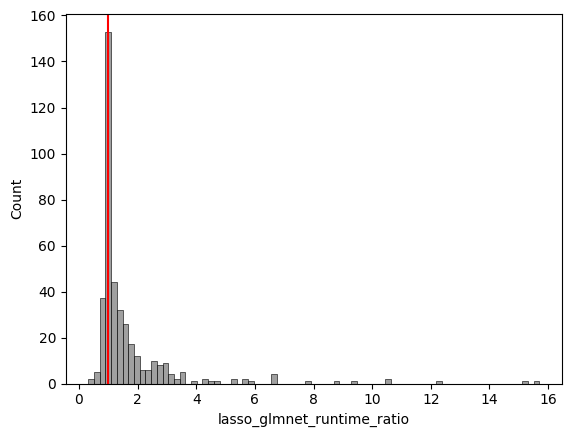

In [4]:
ax = sns.histplot(data=df, x="lasso_glmnet_runtime_ratio", color='gray')
ax.axvline(1, color='red')
plt.show()

In [5]:
analyze_measure_by_factor(df, "runtime_acceptable", "snr", plot=False)
analyze_measure_by_factor(df, "runtime_acceptable", "n_p_ratio", plot=False)

Mean of runtime_acceptable by snr: 
snr
0.1    0.7625
0.5    0.8875
1.0    0.9000
2.0    0.9375
4.0    0.9500
Name: runtime_acceptable, dtype: float64

Std of runtime_acceptable by snr: 
snr
0.1    0.428236
0.5    0.317974
1.0    0.301893
2.0    0.243589
4.0    0.219320
Name: runtime_acceptable, dtype: float64
Mean of runtime_acceptable by n_p_ratio: 
n_p_ratio
0.0010     1.000
0.0025     1.000
0.0040     1.000
0.0050     1.000
0.0100     1.000
0.0200     1.000
0.0250     1.000
0.0400     1.000
0.1000     0.875
0.2000     0.875
0.5000     1.000
1.0000     0.325
2.0000     1.000
5.0000     0.800
10.0000    1.000
50.0000    1.000
Name: runtime_acceptable, dtype: float64

Std of runtime_acceptable by n_p_ratio: 
n_p_ratio
0.0010     0.000000
0.0025     0.000000
0.0040     0.000000
0.0050     0.000000
0.0100     0.000000
0.0200     0.000000
0.0250     0.000000
0.0400     0.000000
0.1000     0.334932
0.2000     0.334932
0.5000     0.000000
1.0000     0.474342
2.0000     0.000000
5.0000     

In [6]:
analyze_measure_by_factor(df, "lasso_glmnet_runtime_ratio", "snr", plot=False)
analyze_measure_by_factor(df, "lasso_glmnet_runtime_ratio", "n_p_ratio", plot=False)
analyze_measure_by_factor(df, "obj.lasso", "snr", plot=False)
analyze_measure_by_factor(df, "obj.lasso", "n_p_ratio", plot=False)

Mean of lasso_glmnet_runtime_ratio by snr: 
snr
0.1    2.515731
0.5    1.702273
1.0    1.680077
2.0    1.381889
4.0    1.230703
Name: lasso_glmnet_runtime_ratio, dtype: float64

Std of lasso_glmnet_runtime_ratio by snr: 
snr
0.1    2.427121
0.5    1.795448
1.0    1.811176
2.0    1.074054
4.0    0.763081
Name: lasso_glmnet_runtime_ratio, dtype: float64
Mean of lasso_glmnet_runtime_ratio by n_p_ratio: 
n_p_ratio
0.0010     0.946925
0.0025     0.932975
0.0040     0.961573
0.0050     0.965131
0.0100     1.020317
0.0200     1.040138
0.0250     1.114266
0.0400     1.192353
0.1000     1.308452
0.2000     1.770839
0.5000     1.178156
1.0000     2.358091
2.0000     2.516351
5.0000     3.143582
10.0000    2.899289
50.0000    2.113289
Name: lasso_glmnet_runtime_ratio, dtype: float64

Std of lasso_glmnet_runtime_ratio by n_p_ratio: 
n_p_ratio
0.0010     0.049090
0.0025     0.042481
0.0040     0.134421
0.0050     0.054347
0.0100     0.142868
0.0200     0.082266
0.0250     0.114079
0.0400     0.3979

In [9]:

obj_threshold = 1e-4
print(len(df))
print(f"Num of obj.lasso - obj.glmnet > threshold: {sum(df['obj.lasso-obj.glmnet'] > obj_threshold)}")
print(f"Num of obj.lasso - obj.ncvreg > threshold: {sum(df['obj.lasso-obj.ncvreg'] > obj_threshold)}")
print(f"Num of obj.lasso - obj.ncvreg > threshold && obj.lasso - obj.glmnet > threshold: {sum((df['obj.lasso-obj.ncvreg'] > obj_threshold) & (df['obj.lasso-obj.ncvreg'] > obj_threshold))}")

400
Num of obj.lasso - obj.glmnet > threshold: 31
Num of obj.lasso - obj.ncvreg > threshold: 6
Num of obj.lasso - obj.ncvreg > threshold && obj.lasso - obj.glmnet > threshold: 6


In [8]:

obj_threshold = 0
print(len(df))
print(f"Num of obj.lasso - obj.glmnet > threshold: {sum(df['obj.lasso-obj.glmnet'] > obj_threshold)}")
print(f"Num of obj.lasso - obj.ncvreg > threshold: {sum(df['obj.lasso-obj.ncvreg'] > obj_threshold)}")
print(f"Num of obj.lasso - obj.ncvreg > threshold && obj.lasso - obj.glmnet > threshold: {sum((df['obj.lasso-obj.ncvreg'] > obj_threshold) & (df['obj.lasso-obj.ncvreg'] > obj_threshold))}")

400
Num of obj.lasso - obj.glmnet > threshold: 153
Num of obj.lasso - obj.ncvreg > threshold: 64
Num of obj.lasso - obj.ncvreg > threshold && obj.lasso - obj.glmnet > threshold: 64


In [7]:

obj_threshold = 0
temp_df = df[df['n_p_ratio'] >= 1]
print(len(temp_df))
print(f"Num of obj.lasso - obj.glmnet > threshold: {sum(temp_df['obj.lasso-obj.glmnet'] > obj_threshold)}")
print(f"Num of obj.lasso - obj.ncvreg > threshold: {sum(temp_df['obj.lasso-obj.ncvreg'] > obj_threshold)}")
print(f"Num of obj.lasso - obj.ncvreg > threshold && obj.lasso - obj.glmnet > threshold: {sum((temp_df['obj.lasso-obj.ncvreg'] > obj_threshold) & (temp_df['obj.lasso-obj.ncvreg'] > obj_threshold))}")

140
Num of obj.lasso - obj.glmnet > threshold: 69
Num of obj.lasso - obj.ncvreg > threshold: 34
Num of obj.lasso - obj.ncvreg > threshold && obj.lasso - obj.glmnet > threshold: 34


# Tests 5

- tol = 1e-4
- run on the server, using the package built for the server

In [26]:
df = pd.read_csv("tests5.csv")
df = process_res_df(df)
print(Counter(df['fastest_alg']))
df

Counter({'glmnet': 270, 'lasso': 130})


n         p  p0  snr  obj.glmnet  obj.ncvreg  obj.lasso  \
0     200     100.0   5  0.1    1.514649    1.514666   1.514642   
1     200     100.0   5  0.5    0.340316    0.340316   0.340317   
2     200     100.0   5  1.0    0.186167    0.186170   0.186168   
3     200     100.0   5  2.0    0.105667    0.105669   0.105669   
4     200     100.0   5  4.0    0.063025    0.063025   0.063026   
5     200     100.0  10  0.1    2.736762    2.736762   2.736725   
6     200     100.0  10  0.5    0.567068    0.567070   0.567065   
7     200     100.0  10  1.0    0.299113    0.299111   0.299109   
8     200     100.0  10  2.0    0.163065    0.163065   0.163065   
9     200     100.0  10  4.0    0.093026    0.093023   0.093024   
10    200     100.0  20  0.1   11.336072   11.336104  11.335942   
11    200     100.0  20  0.5    2.530559    2.530603   2.530544   
12    200     100.0  20  1.0    1.392849    1.392907   1.392851   
13    200     100.0  20  2.0    0.807424    0.807439   0.807423   
14    200     100.0  20  4.0    0.499783    0.499787   0.499776   
15    200     100.0  50  0.1   24.128030   24.128406  24.127864   
16    200     100.0  50  0.5    5.466680    5.466703   5.466627   
17    200     100.0  50  1.0    3.053608    3.053670   3.053577   
18    200     100.0  50  2.0    1.819375    1.819395   1.819344   
19    200     100.0  50  4.0    1.191034    1.191049   1.191019   
20    200    1000.0   5  0.1    1.993989    1.993972   1.993967   
21    200    1000.0   5  0.5    0.636022    0.636025   0.636020   
22    200    1000.0   5  1.0    0.419408    0.419410   0.419409   
23    200    1000.0   5  2.0    0.286546    0.286547   0.286547   
24    200    1000.0   5  4.0    0.208292    0.208292   0.208292   
25    200    1000.0  10  0.1    2.772481    2.772302   2.772262   
26    200    1000.0  10  0.5    0.772393    0.772385   0.772382   
27    200    1000.0  10  1.0    0.535123    0.535124   0.535120   
28    200    1000.0  10  2.0    0.386742    0.386739   0.386740   
29    200    1000.0  10  4.0    0.305312    0.305310   0.305311   
30    200    1000.0  20  0.1   11.482557   11.482413  11.482331   
31    200    1000.0  20  0.5    3.685535    3.685516   3.685509   
32    200    1000.0  20  1.0    2.529132    2.529134   2.529124   
33    200    1000.0  20  2.0    1.853047    1.853047   1.853044   
34    200    1000.0  20  4.0    1.461387    1.461386   1.461383   
35    200    1000.0  50  0.1   26.481582   26.481371  26.481124   
36    200    1000.0  50  0.5    8.350384    8.350403   8.350324   
37    200    1000.0  50  1.0    5.851045    5.851062   5.851017   
38    200    1000.0  50  2.0    4.372492    4.372510   4.372480   
39    200    1000.0  50  4.0    3.531890    3.531896   3.531885   
40    200    5000.0   5  0.1    1.589062    1.589049   1.589025   
41    200    5000.0   5  0.5    0.527746    0.527745   0.527743   
42    200    5000.0   5  1.0    0.365462    0.365460   0.365462   
43    200    5000.0   5  2.0    0.262091    0.262092   0.262092   
44    200    5000.0   5  4.0    0.196420    0.196420   0.196420   
45    200    5000.0  10  0.1    2.069424    2.069411   2.069332   
46    200    5000.0  10  0.5    0.582875    0.582841   0.582848   
47    200    5000.0  10  1.0    0.403374    0.403366   0.403361   
48    200    5000.0  10  2.0    0.307463    0.307450   0.307451   
49    200    5000.0  10  4.0    0.245967    0.245962   0.245964   
50    200    5000.0  20  0.1   10.027313   10.027260  10.026879   
51    200    5000.0  20  0.5    3.441772    3.441733   3.441706   
52    200    5000.0  20  1.0    2.433027    2.433034   2.433009   
53    200    5000.0  20  2.0    1.818922    1.818931   1.818920   
54    200    5000.0  20  4.0    1.459656    1.459657   1.459655   
55    200    5000.0  50  0.1   22.494830   22.494991  22.493952   
56    200    5000.0  50  0.5    7.726821    7.726845   7.726727   
57    200    5000.0  50  1.0    5.549260    5.549229   5.549209   
58    200    5000.0  50  2.0    4.194285    4.194265   

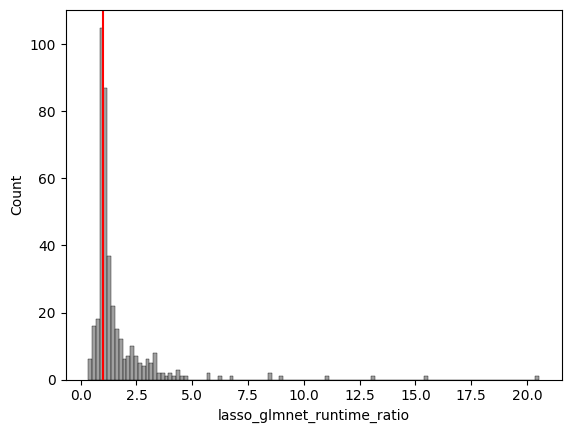

In [6]:
ax = sns.histplot(data=df, x="lasso_glmnet_runtime_ratio", color='gray')
ax.axvline(1, color='red')
plt.show()

In [23]:
analyze_measure_by_factor(df, "runtime_acceptable", "snr", plot=False)
analyze_measure_by_factor(df, "runtime_acceptable", "n_p_ratio", plot=False)

Mean of runtime_acceptable by snr: 
snr
0.1    0.7875
0.5    0.9000
1.0    0.9500
2.0    0.9500
4.0    0.9625
Name: runtime_acceptable, dtype: float64

Std of runtime_acceptable by snr: 
snr
0.1    0.411658
0.5    0.301893
1.0    0.219320
2.0    0.219320
4.0    0.191182
Name: runtime_acceptable, dtype: float64
Mean of runtime_acceptable by n_p_ratio: 
n_p_ratio
0.0010     1.000
0.0025     1.000
0.0040     1.000
0.0050     1.000
0.0100     1.000
0.0200     1.000
0.0250     0.950
0.0400     1.000
0.1000     0.925
0.2000     0.925
0.5000     1.000
1.0000     0.400
2.0000     1.000
5.0000     0.875
10.0000    1.000
50.0000    1.000
Name: runtime_acceptable, dtype: float64

Std of runtime_acceptable by n_p_ratio: 
n_p_ratio
0.0010     0.000000
0.0025     0.000000
0.0040     0.000000
0.0050     0.000000
0.0100     0.000000
0.0200     0.000000
0.0250     0.223607
0.0400     0.000000
0.1000     0.266747
0.2000     0.266747
0.5000     0.000000
1.0000     0.496139
2.0000     0.000000
5.0000     

In [24]:
analyze_measure_by_factor(df, "lasso_glmnet_runtime_ratio", "snr", plot=False)
analyze_measure_by_factor(df, "lasso_glmnet_runtime_ratio", "n_p_ratio", plot=False)
analyze_measure_by_factor(df, "obj.lasso", "snr", plot=False)
analyze_measure_by_factor(df, "obj.lasso", "n_p_ratio", plot=False)

Mean of lasso_glmnet_runtime_ratio by snr: 
snr
0.1    2.502701
0.5    1.786378
1.0    1.364124
2.0    1.430693
4.0    1.178331
Name: lasso_glmnet_runtime_ratio, dtype: float64

Std of lasso_glmnet_runtime_ratio by snr: 
snr
0.1    2.867162
0.5    2.035129
1.0    0.797329
2.0    1.235119
4.0    0.614607
Name: lasso_glmnet_runtime_ratio, dtype: float64
Mean of lasso_glmnet_runtime_ratio by n_p_ratio: 
n_p_ratio
0.0010     0.989386
0.0025     0.963337
0.0040     1.014800
0.0050     0.977094
0.0100     1.021926
0.0200     1.049981
0.0250     1.134130
0.0400     1.111562
0.1000     1.293292
0.2000     1.778928
0.5000     1.115008
1.0000     2.333936
2.0000     3.360108
5.0000     2.550478
10.0000    2.048633
50.0000    2.349669
Name: lasso_glmnet_runtime_ratio, dtype: float64

Std of lasso_glmnet_runtime_ratio by n_p_ratio: 
n_p_ratio
0.0010     0.053790
0.0025     0.048973
0.0040     0.170091
0.0050     0.073300
0.0100     0.115141
0.0200     0.122517
0.0250     0.116002
0.0400     0.5963

In [25]:

obj_threshold = 1e-4
print(f"Num of obj.lasso - obj.glmnet > threshold: {sum(df['obj.lasso-obj.glmnet'] > obj_threshold)}")
print(f"Num of obj.lasso - obj.ncvreg > threshold: {sum(df['obj.lasso-obj.ncvreg'] > obj_threshold)}")
print(f"Num of obj.lasso - obj.ncvreg > threshold && obj.lasso - obj.glmnet > threshold: {sum((df['obj.lasso-obj.ncvreg'] > obj_threshold) & (df['obj.lasso-obj.ncvreg'] > obj_threshold))}")

Num of obj.lasso - obj.glmnet > threshold: 27
Num of obj.lasso - obj.ncvreg > threshold: 10
Num of obj.lasso - obj.ncvreg > threshold && obj.lasso - obj.glmnet > threshold: 10


# Tests 3

- tol = 1e-4
- run on the server
- Note that the parameter settings are a bit different from those in test 2 and test 4.

In [81]:
df = pd.read_csv("tests3.csv")
df = process_res_df(df)
print(Counter(df['fastest_alg']))
# df

Counter({'glmnet': 257, 'lasso': 143})


n         p  p0  sig2noise.ratio  obj.glmnet  obj.ncvreg   obj.lasso  \
0     200     100.0   5              0.1    1.514649    1.514666    1.514642   
1     200     100.0   5              0.5    0.337357    0.337359    0.337356   
2     200     100.0   5              1.0    0.216733    0.216732    0.216732   
3     200     100.0   5              2.0    0.393131    0.393130    0.393129   
4     200     100.0   5              4.0    0.093485    0.093484    0.093485   
5     200     100.0  10              0.1    5.727885    5.727894    5.727865   
6     200     100.0  10              0.5    2.071859    2.071877    2.071853   
7     200     100.0  10              1.0    1.109766    1.109780    1.109763   
8     200     100.0  10              2.0    0.283253    0.283254    0.283253   
9     200     100.0  10              4.0    0.339700    0.339700    0.339697   
10    200     100.0  20              0.1   13.354879   13.354935   13.354830   
11    200     100.0  20              0.5    2.847104    2.847104    2.847087   
12    200     100.0  20              1.0    2.455005    2.454994    2.454970   
13    200     100.0  20              2.0    0.833970    0.833974    0.833961   
14    200     100.0  20              4.0    0.249830    0.249823    0.249824   
15    200     100.0  50              0.1  128.928912  128.929215  128.928258   
16    200     100.0  50              0.5    3.610816    3.610820    3.610799   
17    200     100.0  50              1.0    2.896735    2.896725    2.896712   
18    200     100.0  50              2.0    1.641880    1.641908    1.641861   
19    200     100.0  50              4.0    0.839167    0.839160    0.839150   
20    200    1000.0   5              0.1    5.787855    0.842778    5.787833   
21    200    1000.0   5              0.5    1.701156    0.279979    1.701153   
22    200    1000.0   5              1.0    0.424965    0.067838    0.424965   
23    200    1000.0   5              2.0    0.293597    0.053391    0.293598   
24    200    1000.0   5              4.0    0.198437    0.035364    0.198437   
25    200    1000.0  10              0.1    5.080816    0.671244    5.080677   
26    200    1000.0  10              0.5    1.417677    0.203248    1.417669   
27    200    1000.0  10              1.0    0.972787    0.148081    0.972789   
28    200    1000.0  10              2.0    0.674872    0.108450    0.674872   
29    200    1000.0  10              4.0    1.230146    0.277161    1.230146   
30    200    1000.0  20              0.1   11.952100    1.603639   11.951925   
31    200    1000.0  20              0.5    3.871313    0.578870    3.871303   
32    200    1000.0  20              1.0    1.620274    0.228795    1.620268   
33    200    1000.0  20              2.0    2.131214    0.351612    2.131211   
34    200    1000.0  20              4.0    1.049151    0.156147    1.049150   
35    200    1000.0  50              0.1   16.984397    2.243121   16.983934   
36    200    1000.0  50              0.5    3.994204    0.507550    3.994169   
37    200    1000.0  50              1.0   10.237062    1.718152   10.237043   
38    200    1000.0  50              2.0    3.158366    0.429216    3.158354   
39    200    1000.0  50              4.0    4.002307    0.786791    4.002306   
40    200    5000.0   5              0.1    4.946816    0.607951    4.946639   
41    200    5000.0   5              0.5    1.385834    0.191729    1.385830   
42    200    5000.0   5              1.0    0.277839    0.036018    0.277843   
43    200    5000.0   5              2.0    0.582671    0.092471    0.582669   
44    200    5000.0   5              4.0    0.215719    0.032944    0.215719   
45    200    5000.0  10              0.1    4.118145    0.487881    4.118083   
46    200    5000.0  10              0.5    2.594351    0.352396    2.594330   
47    200    5000.0  10              1.0    0.455273    0.054112    0.455273   
48    200    5000.0  10              2.0    0.325569    0.038423    0.325561   
49    20

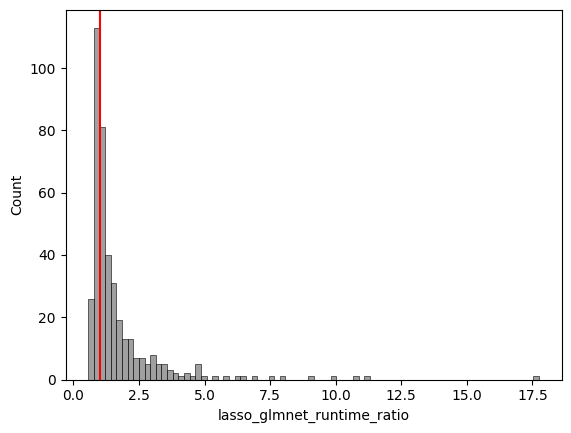

In [27]:
ax = sns.histplot(data=df, x="lasso_glmnet_runtime_ratio", color='gray')
ax.axvline(1, color='red')
plt.show()

Mean of lasso_glmnet_runtime_ratio by sig2noise.ratio: 
sig2noise.ratio
0.1    2.476929
0.5    1.687535
1.0    1.524252
2.0    1.385226
4.0    1.315781
Name: lasso_glmnet_runtime_ratio, dtype: float64

Std of lasso_glmnet_runtime_ratio by sig2noise.ratio: 
sig2noise.ratio
0.1    2.472825
0.5    1.327390
1.0    1.404642
2.0    1.082428
4.0    1.084807
Name: lasso_glmnet_runtime_ratio, dtype: float64


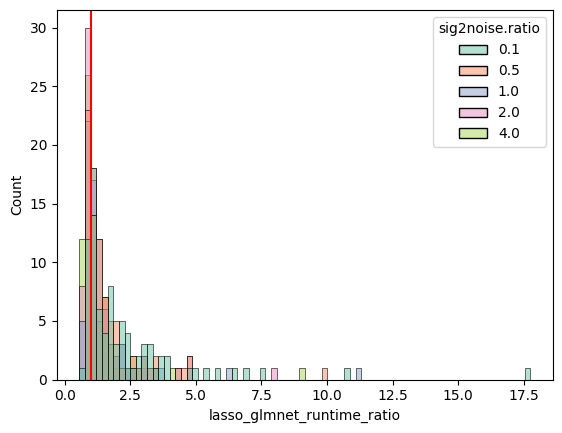

Mean of lasso_glmnet_runtime_ratio by n_p_ratio: 
n_p_ratio
0.0010     0.867753
0.0025     0.935184
0.0040     0.845905
0.0050     1.062987
0.0100     0.864313
0.0200     1.019884
0.0250     1.260458
0.0400     1.014532
0.1000     1.242373
0.2000     1.372228
0.5000     1.367721
1.0000     2.839713
2.0000     1.880660
5.0000     1.861343
10.0000    2.506487
50.0000    5.301698
Name: lasso_glmnet_runtime_ratio, dtype: float64

Std of lasso_glmnet_runtime_ratio by n_p_ratio: 
n_p_ratio
0.0010     0.064402
0.0025     0.097951
0.0040     0.086931
0.0050     0.218018
0.0100     0.074018
0.0200     0.076515
0.0250     0.217313
0.0400     0.278372
0.1000     0.557243
0.2000     0.632670
0.5000     0.703413
1.0000     2.881700
2.0000     1.053248
5.0000     0.691545
10.0000    1.392657
50.0000    2.964655
Name: lasso_glmnet_runtime_ratio, dtype: float64


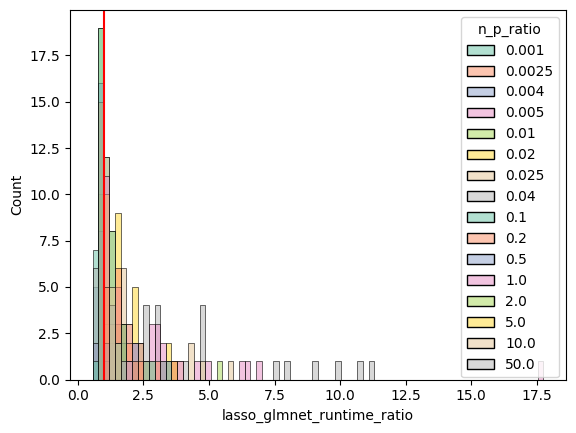

Mean of obj.lasso by sig2noise.ratio: 
sig2noise.ratio
0.1    17.060207
0.5     4.962961
1.0     3.113238
2.0     1.772924
4.0     1.391269
Name: obj.lasso, dtype: float64

Std of obj.lasso by sig2noise.ratio: 
sig2noise.ratio
0.1    25.295594
0.5     6.000231
1.0     4.088931
2.0     1.944366
4.0     1.763448
Name: obj.lasso, dtype: float64


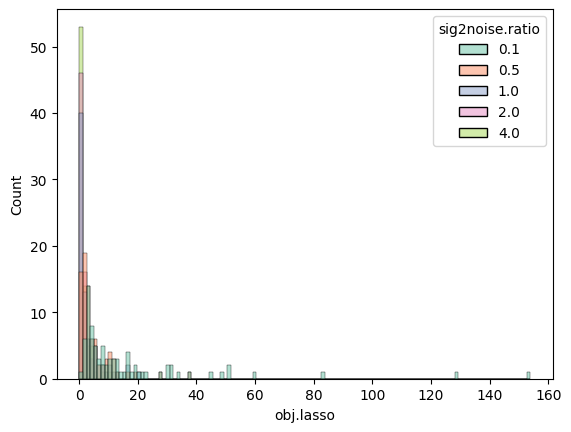

Mean of obj.lasso by n_p_ratio: 
n_p_ratio
0.0010      3.112205
0.0025      4.783310
0.0040      3.472155
0.0050     10.566507
0.0100      3.704215
0.0200      4.403188
0.0250      7.843399
0.0400      4.912836
0.1000      8.498282
0.2000      4.993317
0.5000      5.739989
1.0000      2.872526
2.0000      8.487261
5.0000      5.239448
10.0000     4.625112
50.0000     8.345074
Name: obj.lasso, dtype: float64

Std of obj.lasso by n_p_ratio: 
n_p_ratio
0.0010      4.000905
0.0025      7.025480
0.0040      5.750892
0.0050     19.917585
0.0100      5.914935
0.0200      4.482145
0.0250     12.358101
0.0400      8.261720
0.1000     24.405614
0.2000      9.670178
0.5000      9.862663
1.0000      3.695886
2.0000     28.507654
5.0000      9.201150
10.0000     7.451224
50.0000    13.082029
Name: obj.lasso, dtype: float64


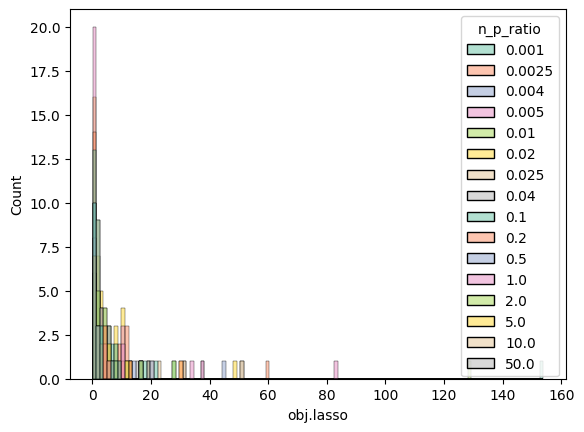

In [71]:
analyze_measure_by_factor(df, "lasso_glmnet_runtime_ratio", "sig2noise.ratio")
analyze_measure_by_factor(df, "lasso_glmnet_runtime_ratio", "n_p_ratio")
analyze_measure_by_factor(df, "obj.lasso", "sig2noise.ratio")
analyze_measure_by_factor(df, "obj.lasso", "n_p_ratio")

In [19]:
obj_threshold = 1e-4
# df_obj = df[(df['obj.lasso-obj.glmnet'] > obj_threshold) | (df['obj.lasso-obj.ncvreg'] > obj_threshold)]
df_obj = df[(df['obj.lasso-obj.glmnet'] > obj_threshold)]
print(f"{len(df_obj)}")
df_obj

21


n         p  p0  sig2noise.ratio  obj.glmnet  obj.ncvreg  obj.lasso  \
227  1000    1000.0  10              1.0    0.518851    0.519136   0.519170   
233  1000    1000.0  20              2.0    1.434224    1.434397   1.434362   
297  1000  200000.0  50              1.0    9.826399    1.687854   9.826531   
320  5000    1000.0   5              0.1    3.290393    3.290564   3.290530   
325  5000    1000.0  10              0.1    7.667032    7.667541   7.667196   
331  5000    1000.0  20              0.5    2.719693    2.719795   2.719801   
336  5000    1000.0  50              0.5   10.160500   10.160657  10.160602   
340  5000    5000.0   5              0.1    4.633318    4.634836   4.634089   
341  5000    5000.0   5              0.5    1.328102    1.328390   1.328549   
342  5000    5000.0   5              1.0    0.299297    0.299359   0.299468   
346  5000    5000.0  10              0.5    2.348263    2.349342   2.349483   
347  5000    5000.0  10              1.0    1.399085    1.399245   1.399320   
348  5000    5000.0  10              2.0    0.200852    0.200996   0.201099   
351  5000    5000.0  20              0.5    5.238315    5.240206   5.239505   
352  5000    5000.0  20              1.0    0.618024    0.618945   0.619459   
353  5000    5000.0  20              2.0    1.109554    1.110001   1.110142   
356  5000    5000.0  50              0.5   10.184131   10.186753  10.185073   
357  5000    5000.0  50              1.0   16.301233   16.304741  16.301644   
366  5000   50000.0  10              0.5    1.296679    0.236249   1.296812   
380  5000  200000.0   5              0.1    3.261122    0.513900   3.261396   
390  5000  200000.0  20              0.1   51.691546   10.184832  51.691689   

     obj.lasso-obj.glmnet  obj.lasso-obj.ncvreg  runtime.glmnet  \
227              0.000320              0.000034        1.958201   
233              0.000138             -0.000036        2.028303   
297              0.000132              8.138677       27.038499   
320              0.000136             -0.000034        1.858631   
325              0.000164             -0.000345        1.777183   
331              0.000108              0.000006        1.998807   
336              0.000103             -0.000054        2.586067   
340              0.000772             -0.000747       36.948652   
341              0.000447              0.000159       29.452542   
342              0.000171              0.000109       25.667276   
346              0.001221              0.000142       30.019558   
347              0.000236              0.000075       28.790064   
348              0.000247              0.000103       21.890030   
351              0.001190             -0.000701       34.172860   
352              0.001435              0.000514       26.758593   
353              0.000588              0.000141       19.878993   
356              0.000942             -0.001680       33.809929   
357              0.000411             -0.003096       28.438405   
366              0.000133              1.060563       37.889800   
380              0.000274              2.747497        2.264923   
390              0.000143             41.506857        2.314175   

     runtime.ncvreg  runtime.lasso fastest_alg  
227        6.458931       2.065071      glmnet  
233        5.719742       2.998838      glmnet  
297       72.577354      27.962549      glmnet  
320        4.598708       3.160250      glmnet  
325        3.820644       3.813666      glmnet  
331        3.736984       2.908821      glmnet  
336        4.918589       4.944638      glmnet  
340      125.504800     144.790459      glmnet  
341       98.699848      59.544036      glmnet  
342       80.587503      30.916721      glmnet  
346      110.159860      83.629999      glmnet  
347       90.335859      60.632539      glmnet  
348       67.484643      33.324656      glmnet  
351       98.302892     111.126478      glmnet  
352      110.343677      83.086664      glmnet  
353       

## Tests 2

- tol = 1e-5
- run on Yu's MacBook
- Since the tolerance is much smaller, lasso runs slower, and the accuracy is much higher, with only one case slightly worse than glmnet. 
- So for this test result, our major focus is how the two measures change along with the factors.
- Note that there is slight change in variable names.

In [82]:
df = pd.read_csv("tests2.csv")
df = process_res_df(df)
print(Counter(df['fastest_alg']))
df

Counter({'glmnet': 292, 'lasso': 58, 'ncvreg': 5})


n         p  p0  snr  obj.glmnet  obj.ncvreg   obj.lasso  \
0      200     100.0   5  0.1    1.514649    1.514666    1.514638   
1      200     100.0   5  0.5    0.337357    0.337359    0.337354   
2      200     100.0   5  1.0    0.216733    0.216732    0.216730   
3      200     100.0   5  2.0    0.393131    0.393130    0.393128   
4      200     100.0   5  4.0    0.093485    0.093484    0.093484   
5      200     100.0  10  0.1    5.727885    5.727894    5.727859   
6      200     100.0  10  0.5    2.071859    2.071877    2.071848   
7      200     100.0  10  1.0    1.109766    1.109780    1.109761   
8      200     100.0  10  2.0    0.283253    0.283254    0.283250   
9      200     100.0  10  4.0    0.339700    0.339700    0.339696   
10     200     100.0  20  0.1   13.354879   13.354935   13.354824   
11     200     100.0  20  0.5    2.847104    2.847104    2.847084   
12     200     100.0  20  1.0    2.455005    2.454994    2.454965   
13     200     100.0  20  2.0    0.833970    0.833974    0.833958   
14     200     100.0  20  4.0    0.249830    0.249823    0.249822   
15     200     100.0  50  0.1  128.928912  128.929215  128.928248   
16     200     100.0  50  0.5    3.610816    3.610820    3.610794   
17     200     100.0  50  1.0    2.896735    2.896725    2.896706   
18     200     100.0  50  2.0    1.641880    1.641908    1.641857   
19     200     100.0  50  4.0    0.839167    0.839160    0.839148   
20     200    1000.0   5  0.1    5.787855    5.787905    5.787821   
21     200    1000.0   5  0.5    1.701156    1.701161    1.701152   
22     200    1000.0   5  1.0    0.424965    0.424965    0.424964   
23     200    1000.0   5  2.0    0.293597    0.293598    0.293597   
24     200    1000.0   5  4.0    0.198437    0.198437    0.198437   
25     200    1000.0  10  0.1    5.080816    5.080737    5.080666   
26     200    1000.0  10  0.5    1.417677    1.417675    1.417662   
27     200    1000.0  10  1.0    0.972787    0.972790    0.972783   
28     200    1000.0  10  2.0    0.674872    0.674876    0.674870   
29     200    1000.0  10  4.0    1.230146    1.230146    1.230145   
30     200    1000.0  20  0.1   11.952100   11.952123   11.951915   
31     200    1000.0  20  0.5    3.871313    3.871315    3.871299   
32     200    1000.0  20  1.0    1.620274    1.620280    1.620260   
33     200    1000.0  20  2.0    2.131214    2.131227    2.131207   
34     200    1000.0  20  4.0    1.049151    1.049152    1.049146   
35     200    1000.0  50  0.1   16.984397   16.984063   16.983922   
36     200    1000.0  50  0.5    3.994204    3.994226    3.994158   
37     200    1000.0  50  1.0   10.237062   10.237085   10.237038   
38     200    1000.0  50  2.0    3.158366    3.158389    3.158347   
39     200    1000.0  50  4.0    4.002307    4.002319    4.002305   
40     200   10000.0   5  0.1    4.512199    4.512224    4.511980   
41     200   10000.0   5  0.5    1.522868    1.522859    1.522851   
42     200   10000.0   5  1.0    0.289830    0.289830    0.289828   
43     200   10000.0   5  2.0    0.634141    0.634145    0.634139   
44     200   10000.0   5  4.0    0.192771    0.192771    0.192771   
45     200   10000.0  10  0.1    4.370795    4.370721    4.370591   
46     200   10000.0  10  0.5    2.569955    2.569952    2.569933   
47     200   10000.0  10  1.0    0.442690    0.442680    0.442672   
48     200   10000.0  10  2.0    0.329346    0.329362    0.329335   
49     200   10000.0  10  4.0    0.949670    0.949671    0.949667   
50     200   10000.0  20  0.1    4.580093    4.579947    4.579850   
51     200   10000.0  20  0.5    8.013001    8.013020    8.012925   
52     200   10000.0  20  1.0    2.504745    2.504755    2.504729   
53     200   10000.0  20  2.0    2.359432    2.359442    2.359417   
54     200   10000.0  20  4.0    1.517071    1.517104    1.517061   
55     200   10000.0  50  0.1   45.987252   45.986625   45.985637   
56     200   10000.0  50  0.5    6.743524    6.743545    6.743438   
57     

Mean of lasso_glmnet_runtime_ratio by snr: 
snr
0.1    13.459816
0.5     7.461496
1.0     4.957234
2.0     4.969213
4.0     4.044089
Name: lasso_glmnet_runtime_ratio, dtype: float64

Std of lasso_glmnet_runtime_ratio by snr: 
snr
0.1    27.021679
0.5     9.683759
1.0     5.859081
2.0     5.897551
4.0     5.464677
Name: lasso_glmnet_runtime_ratio, dtype: float64


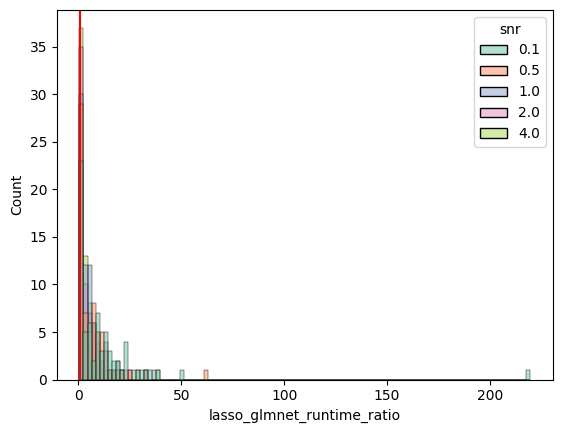

Mean of lasso_glmnet_runtime_ratio by n_p_ratio: 
n_p_ratio
0.000667       0.956814
0.001667       0.998478
0.002000       1.050517
0.003333       1.188737
0.005000       1.166079
0.010000       1.510706
0.020000       2.087877
0.050000       2.776400
0.100000       4.818563
0.200000       5.128764
0.500000       6.106091
1.000000      21.946432
2.000000       8.394797
5.000000      10.846894
10.000000     10.729344
100.000000    16.970401
Name: lasso_glmnet_runtime_ratio, dtype: float64

Std of lasso_glmnet_runtime_ratio by n_p_ratio: 
n_p_ratio
0.000667       0.093494
0.001667       0.185334
0.002000       0.158243
0.003333       0.601216
0.005000       0.293253
0.010000       0.610771
0.020000       0.925903
0.050000       1.464525
0.100000       4.361500
0.200000       2.793937
0.500000       3.836186
1.000000      36.836529
2.000000       4.120194
5.000000       4.485456
10.000000      7.576278
100.000000    12.593094
Name: lasso_glmnet_runtime_ratio, dtype: float64


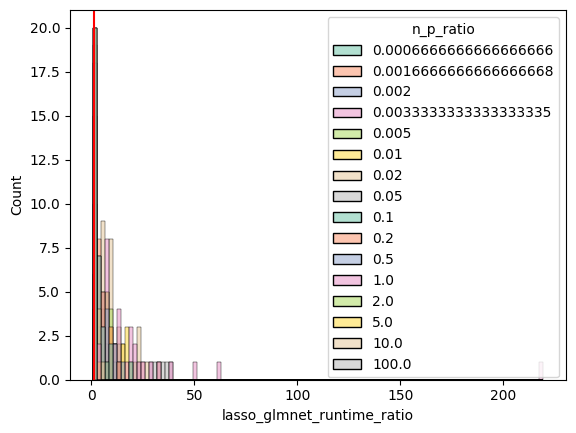

Mean of obj.lasso by snr: 
snr
0.1    15.077927
0.5     4.469577
1.0     2.690154
2.0     1.651509
4.0     1.382938
Name: obj.lasso, dtype: float64

Std of obj.lasso by snr: 
snr
0.1    20.358621
0.5     5.335997
1.0     3.379028
2.0     1.868625
4.0     1.836293
Name: obj.lasso, dtype: float64


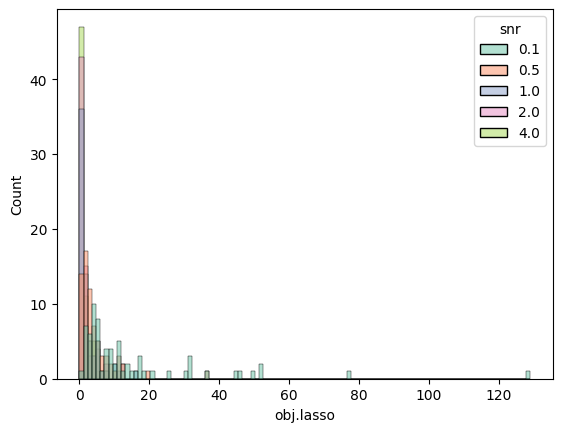

Mean of obj.lasso by n_p_ratio: 
n_p_ratio
0.000667       2.881531
0.001667       5.009790
0.002000       3.110208
0.003333      10.152942
0.005000       3.524326
0.010000       4.350574
0.020000       5.267778
0.050000       3.888669
0.100000       5.685261
0.200000       3.839085
0.500000       5.739979
1.000000       2.240917
2.000000       8.487258
5.000000       5.631866
10.000000      4.889132
100.000000     8.446840
Name: obj.lasso, dtype: float64

Std of obj.lasso by n_p_ratio: 
n_p_ratio
0.000667       3.443827
0.001667       8.112469
0.002000       4.650673
0.003333      18.676752
0.005000       5.590685
0.010000       4.625821
0.020000      10.063364
0.050000       4.413489
0.100000      11.423979
0.200000       4.436488
0.500000       9.862653
1.000000       2.728471
2.000000      28.507653
5.000000      10.888918
10.000000      7.593784
100.000000    13.259984
Name: obj.lasso, dtype: float64


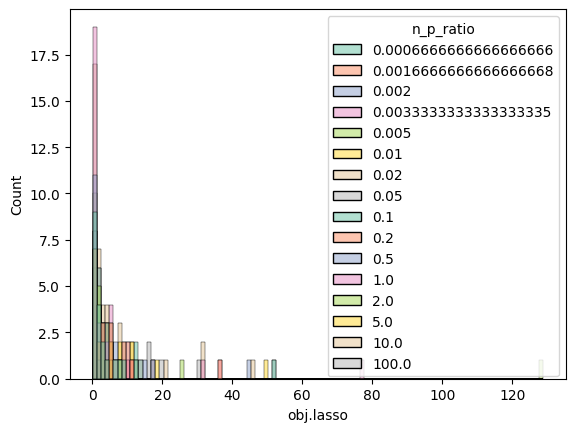

In [83]:
analyze_measure_by_factor(df, "lasso_glmnet_runtime_ratio", "snr")
analyze_measure_by_factor(df, "lasso_glmnet_runtime_ratio", "n_p_ratio")
analyze_measure_by_factor(df, "obj.lasso", "snr")
analyze_measure_by_factor(df, "obj.lasso", "n_p_ratio")

In [78]:
obj_threshold = 0
df_obj = df[(df['obj.lasso-obj.glmnet'] > obj_threshold) | (df['obj.lasso-obj.ncvreg'] > obj_threshold)]
print(f"{len(df_obj)}")
df_obj

1


n       p  p0  snr  obj.glmnet  obj.ncvreg  obj.lasso  \
322  10000  1000.0   5  1.0    0.899051    0.899059   0.899051   

     obj.lasso-obj.glmnet  obj.lasso-obj.ncvreg  runtime.glmnet  \
322          1.674261e-07             -0.000008        3.622062   

     runtime.ncvreg  runtime.lasso fastest_alg  lasso_glmnet_runtime_ratio  
322         6.78033      15.404754      glmnet                    4.253034

## Tests 4

- tol = 1e-5
- run on the DAGS server
- Since the tolerance is much smaller, lasso runs slower, and the accuracy is much higher, with only one case slightly worse than glmnet. 
- So for this test result, our major focus is how the two measures change along with the factors.

In [84]:
df = pd.read_csv("tests4.csv")
df = process_res_df(df)
print(Counter(df['fastest_alg']))
df

Counter({'glmnet': 339, 'lasso': 21})


n         p  p0  snr  obj.glmnet  obj.ncvreg   obj.lasso  \
0      200     100.0   5  0.1    1.514649    1.514666    1.514638   
1      200     100.0   5  0.5    0.337357    0.337359    0.337354   
2      200     100.0   5  1.0    0.216733    0.216732    0.216730   
3      200     100.0   5  2.0    0.393131    0.393130    0.393128   
4      200     100.0   5  4.0    0.093485    0.093484    0.093484   
5      200     100.0  10  0.1    5.727885    5.727894    5.727859   
6      200     100.0  10  0.5    2.071859    2.071877    2.071848   
7      200     100.0  10  1.0    1.109766    1.109780    1.109761   
8      200     100.0  10  2.0    0.283253    0.283254    0.283250   
9      200     100.0  10  4.0    0.339700    0.339700    0.339696   
10     200     100.0  20  0.1   13.354879   13.354935   13.354824   
11     200     100.0  20  0.5    2.847104    2.847104    2.847084   
12     200     100.0  20  1.0    2.455005    2.454994    2.454965   
13     200     100.0  20  2.0    0.833970    0.833974    0.833958   
14     200     100.0  20  4.0    0.249830    0.249823    0.249822   
15     200     100.0  50  0.1  128.928912  128.929215  128.928248   
16     200     100.0  50  0.5    3.610816    3.610820    3.610794   
17     200     100.0  50  1.0    2.896735    2.896725    2.896706   
18     200     100.0  50  2.0    1.641880    1.641908    1.641857   
19     200     100.0  50  4.0    0.839167    0.839160    0.839148   
20     200    1000.0   5  0.1    5.787855    5.787905    5.787821   
21     200    1000.0   5  0.5    1.701156    1.701161    1.701152   
22     200    1000.0   5  1.0    0.424965    0.424965    0.424964   
23     200    1000.0   5  2.0    0.293597    0.293598    0.293597   
24     200    1000.0   5  4.0    0.198437    0.198437    0.198437   
25     200    1000.0  10  0.1    5.080816    5.080737    5.080666   
26     200    1000.0  10  0.5    1.417677    1.417675    1.417662   
27     200    1000.0  10  1.0    0.972787    0.972790    0.972783   
28     200    1000.0  10  2.0    0.674872    0.674876    0.674870   
29     200    1000.0  10  4.0    1.230146    1.230146    1.230145   
30     200    1000.0  20  0.1   11.952100   11.952123   11.951915   
31     200    1000.0  20  0.5    3.871313    3.871315    3.871299   
32     200    1000.0  20  1.0    1.620274    1.620280    1.620260   
33     200    1000.0  20  2.0    2.131214    2.131227    2.131207   
34     200    1000.0  20  4.0    1.049151    1.049152    1.049146   
35     200    1000.0  50  0.1   16.984397   16.984063   16.983922   
36     200    1000.0  50  0.5    3.994204    3.994226    3.994158   
37     200    1000.0  50  1.0   10.237062   10.237085   10.237038   
38     200    1000.0  50  2.0    3.158366    3.158389    3.158347   
39     200    1000.0  50  4.0    4.002307    4.002319    4.002305   
40     200   10000.0   5  0.1    4.512199    4.512224    4.511980   
41     200   10000.0   5  0.5    1.522868    1.522859    1.522851   
42     200   10000.0   5  1.0    0.289830    0.289830    0.289828   
43     200   10000.0   5  2.0    0.634141    0.634145    0.634139   
44     200   10000.0   5  4.0    0.192771    0.192771    0.192771   
45     200   10000.0  10  0.1    4.370795    4.370721    4.370591   
46     200   10000.0  10  0.5    2.569955    2.569952    2.569933   
47     200   10000.0  10  1.0    0.442690    0.442680    0.442672   
48     200   10000.0  10  2.0    0.329346    0.329362    0.329335   
49     200   10000.0  10  4.0    0.949670    0.949671    0.949667   
50     200   10000.0  20  0.1    4.580093    4.579947    4.579850   
51     200   10000.0  20  0.5    8.013001    8.013020    8.012925   
52     200   10000.0  20  1.0    2.504745    2.504755    2.504729   
53     200   10000.0  20  2.0    2.359432    2.359442    2.359417   
54     200   10000.0  20  4.0    1.517071    1.517104    1.517061   
55     200   10000.0  50  0.1   45.987252   45.986625   45.985637   
56     200   10000.0  50  0.5    6.743524    6.743545    6.743438   
57     

Mean of lasso_glmnet_runtime_ratio by snr: 
snr
0.1    13.026466
0.5     8.038422
1.0     5.927842
2.0     5.268576
4.0     4.333405
Name: lasso_glmnet_runtime_ratio, dtype: float64

Std of lasso_glmnet_runtime_ratio by snr: 
snr
0.1    18.385116
0.5    10.326615
1.0     9.217212
2.0     5.616399
4.0     5.047435
Name: lasso_glmnet_runtime_ratio, dtype: float64


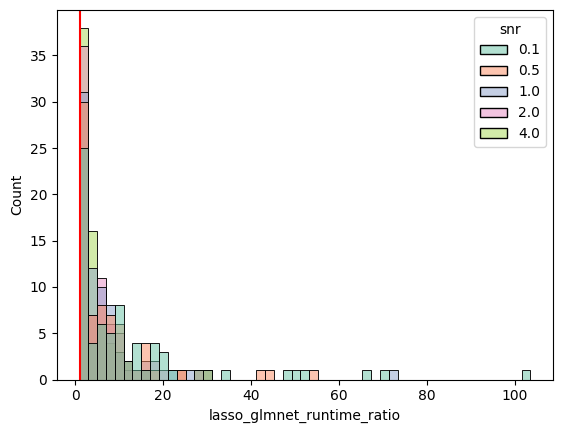

Mean of lasso_glmnet_runtime_ratio by n_p_ratio: 
n_p_ratio
0.000667       1.184295
0.001667       1.125326
0.002000       1.183821
0.003333       1.321868
0.005000       1.317229
0.010000       1.516311
0.020000       2.428995
0.050000       3.462354
0.100000       4.659531
0.200000       6.330876
0.500000       8.778971
1.000000      25.744474
2.000000       6.892258
5.000000       7.640224
10.000000     10.489832
100.000000    11.430291
Name: lasso_glmnet_runtime_ratio, dtype: float64

Std of lasso_glmnet_runtime_ratio by n_p_ratio: 
n_p_ratio
0.000667       0.095787
0.001667       0.191901
0.002000       0.189129
0.003333       0.637115
0.005000       0.337196
0.010000       0.507110
0.020000       1.149435
0.050000       2.034118
0.100000       4.025058
0.200000       3.333606
0.500000       5.688187
1.000000      22.399507
2.000000       2.675764
5.000000       2.898837
10.000000      8.893521
100.000000     8.026869
Name: lasso_glmnet_runtime_ratio, dtype: float64


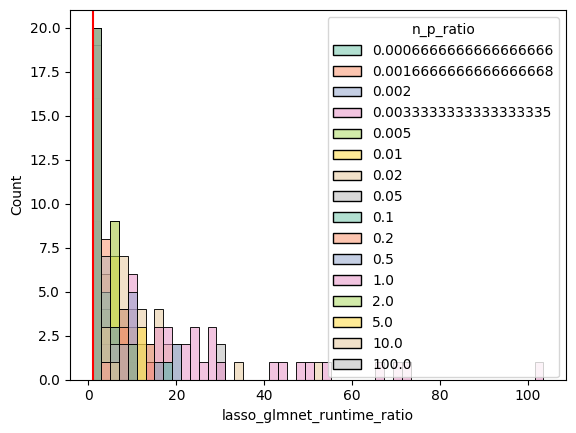

Mean of obj.lasso by snr: 
snr
0.1    15.072234
0.5     4.567528
1.0     2.905123
2.0     1.649188
4.0     1.405602
Name: obj.lasso, dtype: float64

Std of obj.lasso by snr: 
snr
0.1    20.214799
0.5     5.363080
1.0     3.818933
2.0     1.855523
4.0     1.833429
Name: obj.lasso, dtype: float64


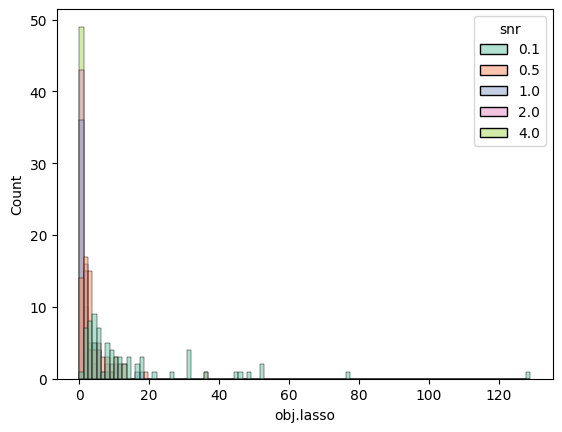

Mean of obj.lasso by n_p_ratio: 
n_p_ratio
0.000667       2.881531
0.001667       5.009790
0.002000       3.110208
0.003333      10.152942
0.005000       3.524326
0.010000       4.350574
0.020000       5.267778
0.050000       3.888669
0.100000       5.685261
0.200000       3.839085
0.500000       5.739979
1.000000       3.182230
2.000000       8.487258
5.000000       5.631866
10.000000      4.889132
100.000000     8.446840
Name: obj.lasso, dtype: float64

Std of obj.lasso by n_p_ratio: 
n_p_ratio
0.000667       3.443827
0.001667       8.112469
0.002000       4.650673
0.003333      18.676752
0.005000       5.590685
0.010000       4.625821
0.020000      10.063364
0.050000       4.413489
0.100000      11.423979
0.200000       4.436488
0.500000       9.862653
1.000000       4.276008
2.000000      28.507653
5.000000      10.888918
10.000000      7.593784
100.000000    13.259984
Name: obj.lasso, dtype: float64


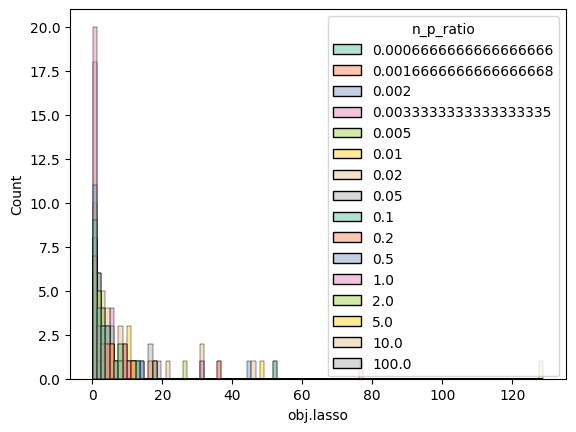

In [85]:
analyze_measure_by_factor(df, "lasso_glmnet_runtime_ratio", "snr")
analyze_measure_by_factor(df, "lasso_glmnet_runtime_ratio", "n_p_ratio")
analyze_measure_by_factor(df, "obj.lasso", "snr")
analyze_measure_by_factor(df, "obj.lasso", "n_p_ratio")

In [86]:
obj_threshold = 0
df_obj = df[(df['obj.lasso-obj.glmnet'] > obj_threshold) | (df['obj.lasso-obj.ncvreg'] > obj_threshold)]
print(f"{len(df_obj)}")
df_obj

1


n       p  p0  snr  obj.glmnet  obj.ncvreg  obj.lasso  \
322  10000  1000.0   5  1.0    0.899051    0.899059   0.899051   

     obj.lasso-obj.glmnet  obj.lasso-obj.ncvreg  runtime.glmnet  \
322          1.674261e-07             -0.000008        2.807424   

     runtime.ncvreg  runtime.lasso fastest_alg  lasso_glmnet_runtime_ratio  \
322        5.827489      13.537536      glmnet                    4.822049   

     n_p_ratio  
322       10.0